# TASK 1: Import all the necessary packages here

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
import math

In [4]:
dataset = pd.read_csv('dataset.csv')
print(dataset.shape)
dataset

(15120, 56)


,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5
5,6,2579,132,6,300,-15,67,230,237,140,...,0,0,0,0,0,0,0,0,0,2
6,7,2606,45,7,270,5,633,222,225,138,...,0,0,0,0,0,0,0,0,0,5
7,8,2605,49,4,234,7,573,222,230,144,...,0,0,0,0,0,0,0,0,0,5
8,9,2617,45,9,240,56,666,223,221,133,...,0,0,0,0,0,0,0,0,0,5
9,10,2612,59,10,247,11,636,228,219,124,...,0,0,0,0,0,0,0,0,0,5


# TASK 2: Check for missing data, and apply a "good" strategy to tackle it

In [5]:
for column in dataset:
    print("{}: {}".format(column, dataset[column].isnull().sum()))
    
# No missing data

Id: 0
Elevation: 0
Aspect: 0
Slope: 0
Horizontal_Distance_To_Hydrology: 0
Vertical_Distance_To_Hydrology: 0
Horizontal_Distance_To_Roadways: 0
Hillshade_9am: 0
Hillshade_Noon: 0
Hillshade_3pm: 0
Horizontal_Distance_To_Fire_Points: 0
Wilderness_Area1: 0
Wilderness_Area2: 0
Wilderness_Area3: 0
Wilderness_Area4: 0
Soil_Type1: 0
Soil_Type2: 0
Soil_Type3: 0
Soil_Type4: 0
Soil_Type5: 0
Soil_Type6: 0
Soil_Type7: 0
Soil_Type8: 0
Soil_Type9: 0
Soil_Type10: 0
Soil_Type11: 0
Soil_Type12: 0
Soil_Type13: 0
Soil_Type14: 0
Soil_Type15: 0
Soil_Type16: 0
Soil_Type17: 0
Soil_Type18: 0
Soil_Type19: 0
Soil_Type20: 0
Soil_Type21: 0
Soil_Type22: 0
Soil_Type23: 0
Soil_Type24: 0
Soil_Type25: 0
Soil_Type26: 0
Soil_Type27: 0
Soil_Type28: 0
Soil_Type29: 0
Soil_Type30: 0
Soil_Type31: 0
Soil_Type32: 0
Soil_Type33: 0
Soil_Type34: 0
Soil_Type35: 0
Soil_Type36: 0
Soil_Type37: 0
Soil_Type38: 0
Soil_Type39: 0
Soil_Type40: 0
Cover_Type: 0


# Randomly split the dataset into training, Tr (80%) and testing, Te (20%)

In [6]:
# keep x variables
var = []

for column in dataset:
    if column != "Cover_Type":
        var.append(column)
        
print(var)

#X variables are the selected variables from the pool
X = dataset[var]
y = dataset["Cover_Type"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

['Id', 'Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40']


# Normalize the data 

In [7]:
min_max_scaler = preprocessing.MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)
pd.DataFrame(X_train)

c:\users\wkgns\onedrive\desktop\python path\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,0.307031,0.243202,0.813889,0.423077,0.396128,0.505714,0.090856,0.594488,0.832258,0.866935,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.476751,0.320745,0.077778,0.230769,0.199553,0.262857,0.044848,0.846457,0.735484,0.536290,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.665785,0.486908,0.244444,0.250000,0.156366,0.298571,0.249927,0.940945,0.767742,0.431452,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.681593,0.729607,0.997222,0.269231,0.268057,0.181429,0.214369,0.783465,0.741935,0.612903,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.822740,0.238167,0.341667,0.692308,0.246463,0.268571,0.157329,0.996063,0.567742,0.112903,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.298763,0.521148,0.075000,0.115385,0.111690,0.218571,0.270682,0.854331,0.819355,0.584677,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.707653,0.401813,0.930556,0.519231,0.092331,0.298571,0.330914,0.582677,0.600000,0.713710,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.909584,0.758812,0.766667,0.096154,0.111690,0.222857,0.227431,0.814961,0.916129,0.697581,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8,0.118791,0.762336,0.777778,0.346154,0.206255,0.364286,0.762845,0.661417,0.903226,0.842742,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9,0.935247,0.574522,0.875000,0.115385,0.157856,0.240000,0.396952,0.803150,0.877419,0.685484,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Run the base learner alone

In [26]:
tree = DecisionTreeClassifier(max_depth = 7)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_train)

In [27]:
# how did our model perform on trainset?
count_misclassified = (y_train != y_pred).sum()
print('TrainSet Misclassified samples: {}'.format(count_misclassified))
Train_base_learner_accuracy = metrics.accuracy_score(y_train, y_pred)
print('TrainSet Accuracy: {:.5f}'.format(Train_base_learner_accuracy))

TrainSet Misclassified samples: 3120
TrainSet Accuracy: 0.74206


In [28]:
y_pred = tree.predict(X_test)
# how did our model perform on testset?
count_misclassified = (y_test != y_pred).sum()
print('TestSet Misclassified samples: {}'.format(count_misclassified))
Test_base_learner_accuracy = metrics.accuracy_score(y_test, y_pred)
print('TestSet Accuracy: {:.5f}'.format(Test_base_learner_accuracy))

TestSet Misclassified samples: 857
TestSet Accuracy: 0.71660


# AdaBoost function definition

In [11]:
#   Set True to 1 and False to -1 for Adaboost function
def Y_P(Y, P):
    result = np.ones(len(Y))
    temp = Y  == P
    temp = pd.DataFrame(temp)
    for i in range(len(temp)):
        if temp["Cover_Type"].iloc[i] == False:
            result[i] = -1
    return result
            
    
def training_adaboost(XTrain, yTrain, num_rounds):
    m, _ = XTrain.shape
    W = np.ones(m)/m
    for i in range(num_rounds):
        model = LogisticRegression(class_weight = W, max_iter = 200, multi_class='warn', solver = 'lbfgs')
        model.fit(XTrain, yTrain)
        y_pred = model.predict(XTrain)
        #calculate sum of weights of misclassified samples
        error = W.dot(y_pred != yTrain)
        alpha = 0.5*(np.log(1-err) - np.log(err))
        
        W = W * np.exp(-alpha * Y_P(yTrain, y_pred)) # vectorized form
        W = W / W.sum() # normalized so it sums to 1
        
        
        

In [16]:
def training_adaboost(XTrain, yTrain, num_rounds):  
    adaboost_train = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=7),
    n_estimators = num_rounds,
    learning_rate=1)
    adaboost_train.fit(XTrain, yTrain)
    return adaboost_train

def testing_adaboost(adaboost_params, XTest, yTest):
    adaboost_params.predict(XTest)
    y_pred = adaboost_train.predict(XTest)
    # how did our model perform on trainset?
    accuracy = metrics.accuracy_score(yTest, y_pred)
    return accuracy

In [17]:
adaboost_train = training_adaboost(X_train, y_train, 5)
print(testing_adaboost(adaboost_train, X_train, y_train))

0.5854828042328042


In [14]:
pred_y = adaboost_train.predict(X_train)
# how did our model perform on trainset?
count_misclassified = (y_train != pred_y).sum()
print('TrainSet Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_train, pred_y)
print('TrainSet Accuracy: {:.5f}'.format(accuracy))

TrainSet Misclassified samples: 5016
TrainSet Accuracy: 0.58532


In [21]:
train_accuracy = []
for i in range(100):
    adaboost_train = training_adaboost(X_train, y_train, i + 1)
    accuracy = testing_adaboost(adaboost_train, X_train, y_train)
    train_accuracy.append(accuracy)
    print("Accuracy of num_rounds {}: {}".format(i+1, accuracy))

Accuracy of num_rounds 1: 0.597718253968254
Accuracy of num_rounds 2: 0.5424107142857143
Accuracy of num_rounds 3: 0.5023974867724867
Accuracy of num_rounds 4: 0.634755291005291
Accuracy of num_rounds 5: 0.5852347883597884
Accuracy of num_rounds 6: 0.6060681216931217
Accuracy of num_rounds 7: 0.6271494708994709
Accuracy of num_rounds 8: 0.6243386243386243
Accuracy of num_rounds 9: 0.66807208994709
Accuracy of num_rounds 10: 0.6443452380952381
Accuracy of num_rounds 11: 0.6905588624338624
Accuracy of num_rounds 12: 0.656084656084656
Accuracy of num_rounds 13: 0.7046957671957672
Accuracy of num_rounds 14: 0.6981646825396826
Accuracy of num_rounds 15: 0.7172619047619048
Accuracy of num_rounds 16: 0.712880291005291
Accuracy of num_rounds 17: 0.7529761904761905
Accuracy of num_rounds 18: 0.7367724867724867
Accuracy of num_rounds 19: 0.7326388888888888
Accuracy of num_rounds 20: 0.7268518518518519
Accuracy of num_rounds 21: 0.7666170634920635
Accuracy of num_rounds 22: 0.7217261904761905
Acc

In [22]:
test_accuracy = []
for i in range(100):
    adaboost_train = training_adaboost(X_train, y_train, i + 1)
    accuracy = testing_adaboost(adaboost_train, X_test, y_test)
    test_accuracy.append(accuracy)
    print("Accuracy of num_rounds {}: {}".format(i+1, accuracy))

Accuracy of num_rounds 1: 0.5651455026455027
Accuracy of num_rounds 2: 0.5036375661375662
Accuracy of num_rounds 3: 0.4781746031746032
Accuracy of num_rounds 4: 0.5949074074074074
Accuracy of num_rounds 5: 0.5565476190476191
Accuracy of num_rounds 6: 0.5734126984126984
Accuracy of num_rounds 7: 0.576058201058201
Accuracy of num_rounds 8: 0.5687830687830688
Accuracy of num_rounds 9: 0.605489417989418
Accuracy of num_rounds 10: 0.5843253968253969
Accuracy of num_rounds 11: 0.6345899470899471
Accuracy of num_rounds 12: 0.6207010582010583
Accuracy of num_rounds 13: 0.6501322751322751
Accuracy of num_rounds 14: 0.6428571428571429
Accuracy of num_rounds 15: 0.6448412698412699
Accuracy of num_rounds 16: 0.6669973544973545
Accuracy of num_rounds 17: 0.6421957671957672
Accuracy of num_rounds 18: 0.6488095238095238
Accuracy of num_rounds 19: 0.6494708994708994
Accuracy of num_rounds 20: 0.6861772486772487
Accuracy of num_rounds 21: 0.6650132275132276
Accuracy of num_rounds 22: 0.6653439153439153

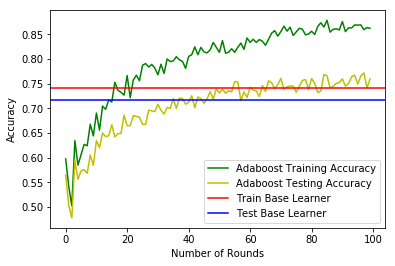

In [49]:
# plot accuracy
X = range(100)
plt.plot(X, train_accuracy, label='Adaboost Training Accuracy', color='g') # plotting t, c separately
plt.plot(X, test_accuracy, label="Adaboost Testing Accuracy", color='y')
plt.axhline(y=Train_base_learner_accuracy, label="Train Base Learner", color='r')
plt.axhline(y=Test_base_learner_accuracy, label="Test Base Learner", color ='b')
plt.legend(loc="lower right")
plt.xlabel("Number of Rounds")
plt.ylabel("Accuracy")
plt.show()

# I have noticed something interesting about the accuracy as number of rounds increases for Adaboost function. The accuracy increases proportional to number of rounds because high number of rounds splits missclassified samples to smaller segements, so it has higher accruacy when it's combined.